# PCA
常用的数据降维方法
- 主成分分析(principalComponent Analysis, PCA)
    - 将数据从原始坐标系转换到新的坐标系，新坐标系的选择由数据本身（方差）决定；
- 因子分析(Factor Analysis)
    - 因子分析中，我们假设观察数据的生成中存在一些观察不到的隐变量，假设观察到的数据是这些隐变量和某些噪声的线性组合；因子分析已经用于社会科学，金融和其他领域中
- 独立成分分析(Idenpendent Component Analysis,ICA) 
    - ICA假设数据从N个数据源生成，这些数据源之间在统计上是相互独立的；同因子分析一样，数据源少于观察数据特征数，从而实现降维

In [1]:
import numpy as np

def loadDataSet(fileName,delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [list(map(float,line)) for line in stringArr]
    return np.mat(datArr)

In [2]:
def pca(dataMat,topNfeat=99999):
    
    meanVals = np.mean(dataMat,axis=0)
    meanRemoved = dataMat - meanVals

    covMat = np.cov(meanRemoved,rowvar=0)
    eigVals,eigVects = np.linalg.eig(np.mat(covMat))
    eigValInd = np.argsort(eigVals)
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    redEigVects = eigVects[:,eigValInd]
    # 获取低维数据，和重构后的数据
    lowDataMat = meanRemoved * redEigVects
    reconMat = (lowDataMat * redEigVects.T) + meanVals
    
    return lowDataMat,reconMat


In [3]:
dataMat = loadDataSet('../data/PCA/testSet.txt')

In [4]:
dataMat

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

In [5]:
lowDMat,reconMat = pca(dataMat,1)

In [6]:
lowDMat.shape

(1000, 1)

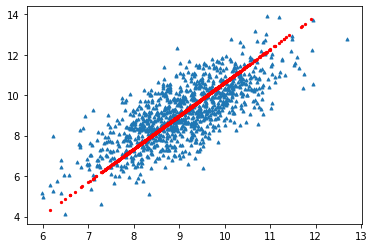

In [7]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0],dataMat[:,1].flatten().A[0],marker='^',s=9)
ax.scatter(reconMat[:,0].flatten().A[0],reconMat[:,1].flatten().A[0],marker='o',s=5,c='red')

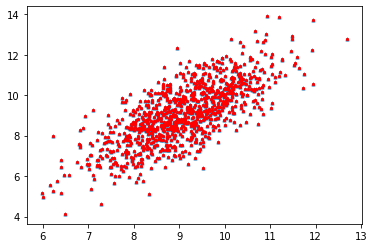

In [8]:
lowDMat,reconMat = pca(dataMat,2)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0],dataMat[:,1].flatten().A[0],marker='^',s=9)
ax.scatter(reconMat[:,0].flatten().A[0],reconMat[:,1].flatten().A[0],marker='o',s=5,c='red')

# e.g. 利用PCA对半导体制造数据降维

In [9]:
# 读取并将Nan替换为平均值
def replaceNanWithMean():
    datMat = loadDataSet('../data/PCA/secom.data',' ')
    numFeat = np.shape(datMat)[1]
    for i in range(numFeat):
        # 获取非Nan平均值
        meanVal = np.mean(datMat[np.nonzero(~np.isnan(datMat[:,i].A))[0],i])
        datMat[np.nonzero(np.isnan(datMat[:,i].A))[0],i] = meanVal
        
    return datMat

In [10]:
dataMat = replaceNanWithMean()

In [11]:
dataMat.shape

(1567, 590)

In [12]:
meanVals = np.mean(dataMat,axis=0)
meanRemoved = dataMat - meanVals
covMat = np.cov(meanRemoved,rowvar=0)
eigVals,eigVects = np.linalg.eig(np.mat(covMat))

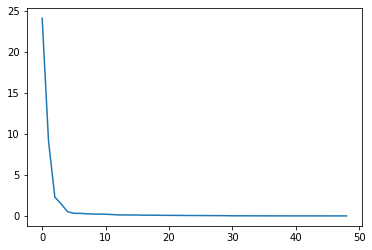

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot((100*eigVals/np.sum(eigVals))[1:50:1])

plt.show()

- 其中特征值为20%是0，这就意味着这些特征是其他特征的副本，其可以通过其他特征来线性表示
- 最前面几个数量级大于$10^5$，这等价于告诉我们只有部分重要特征
- 最后还有一些很小的负数，主要源自数值误差